# Random Forest for Amazon Reviews Classification

Amazon Alexa, also known simply as Alexa, is a virtual assistant technology developed by Amazon, first used in the Amazon Echo smart speaker and the Echo Dot, Echo Studio and Amazon Tap speakers developed by Amazon Lab126. It is capable of voice interaction, music playback, making to-do lists, setting alarms, streaming podcasts, playing audiobooks, and providing weather, traffic, sports, and other real-time information, such as news. Alexa can also control several smart devices using itself as a home automation system. Users are able to extend the Alexa capabilities by installing "skills" (additional functionality developed by third-party vendors, in other settings more commonly called apps) such as weather programs and audio features. It uses NLU (natural language understanding), speech recognition and other weak AI to perform these tasks.

# Details about the dataset

This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc. for learning how to train Machine for sentiment analysis.

- Rating:This column includes votes cast by users. (1-5)
- Date:This column shows on what date users voted.
- Variation: This column shows which product has been commented on.
- Verified_rewiews:User comments
- Feedback: This column indicates whether user comments are positive or negative. 1 is positive comment, 0 is negative comment.

# Step 1: Importing required libraries

In [1]:
import pandas as pd  # for data manipulations using dataframes
import numpy as np   # for data statistical analysis
import seaborn as sns # for statistical data visualizations
import matplotlib.pyplot as plt  # for data visualizations

# Step 2: Loading the dataset

In [71]:
productReviews = pd.read_csv('amazon_alexa.tsv' , sep = '\t')

# Step 3: Exploratory data analysis

In [8]:
productReviews.shape

(3150, 5)

In [9]:
productReviews.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [10]:
productReviews.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


<AxesSubplot:>

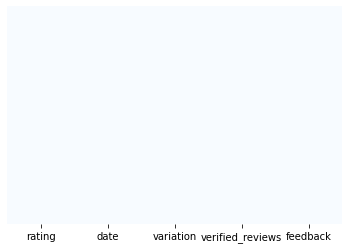

In [12]:
sns.heatmap(productReviews.isnull() , yticklabels = False , cbar = False , cmap = 'Blues')

In [14]:
productReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [16]:
# what are the Alexa products?
productReviews['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [25]:
# how many Alexa products are there ?
productReviews['variation'].unique().size 

#productReviews['variation'].nunique()

16

In [30]:
# how many reviews are there for each product

productReviews['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [64]:
#Which Alexa product gets the highest votes

productReviews.groupby('variation').agg({'rating':'mean'}).sort_values('rating' , ascending = False)

,rating
variation,
Walnut Finish,4.888889
Oak Finish,4.857143
Charcoal Fabric,4.730233
Heather Gray Fabric,4.694268
Configuration: Fire TV Stick,4.591429
Black Show,4.490566
Black Dot,4.453488
White Dot,4.423913
Black Plus,4.370370


In [38]:
# How many positive and negative feedbacks are there

productReviews['feedback'].value_counts()


1    2893
0     257
Name: feedback, dtype: int64

<AxesSubplot:xlabel='feedback', ylabel='count'>

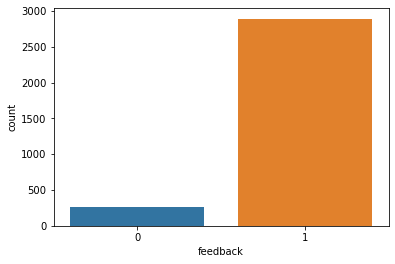

In [41]:
sns.countplot(productReviews['feedback'] , label = 'CustomerFeedback')

[Text(0, 0, 'Charcoal Fabric '),
 Text(1, 0, 'Walnut Finish '),
 Text(2, 0, 'Heather Gray Fabric '),
 Text(3, 0, 'Sandstone Fabric '),
 Text(4, 0, 'Oak Finish '),
 Text(5, 0, 'Black'),
 Text(6, 0, 'White'),
 Text(7, 0, 'Black  Spot'),
 Text(8, 0, 'White  Spot'),
 Text(9, 0, 'Black  Show'),
 Text(10, 0, 'White  Show'),
 Text(11, 0, 'Black  Plus'),
 Text(12, 0, 'White  Plus'),
 Text(13, 0, 'Configuration: Fire TV Stick'),
 Text(14, 0, 'Black  Dot'),
 Text(15, 0, 'White  Dot')]

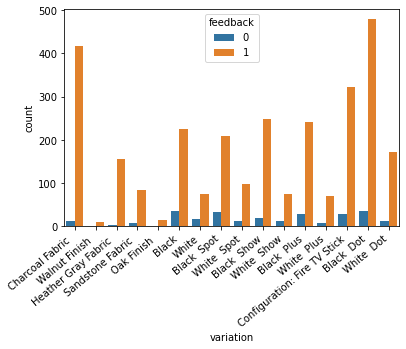

In [60]:
# How many positive & negative feedbacks are there for each product

ax = sns.countplot(x = 'variation', hue = 'feedback' ,data = productReviews)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [63]:
#titanic_ds.groupby(['Pclass' , 'Survived'])['Survived'].count()

productReviews.groupby(['variation','feedback'])['feedback'].count()

variation                     feedback
Black                         0            35
                              1           226
Black  Dot                    0            36
                              1           480
Black  Plus                   0            28
                              1           242
Black  Show                   0            18
                              1           247
Black  Spot                   0            32
                              1           209
Charcoal Fabric               0            12
                              1           418
Configuration: Fire TV Stick  0            28
                              1           322
Heather Gray Fabric           0             2
                              1           155
Oak Finish                    1            14
Sandstone Fabric              0             6
                              1            84
Walnut Finish                 1             9
White                         0          

<AxesSubplot:xlabel='rating', ylabel='count'>

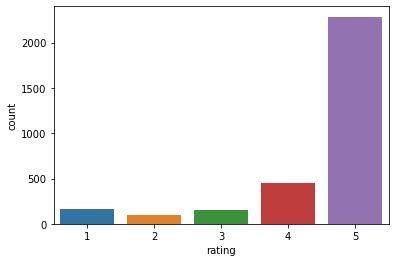

In [67]:
# HOW MUCH WAS USED FROM WHICH VOTES?

sns.countplot(x=productReviews['rating'] , label = 'ss')

# Step 4: Data cleaning &  Feature Engg 

The date and rating of users' comments have been removed. The date on which the comment is made does not matter about the comment. 

It may cause overfitting as the given score will be directly proportional to the comment. 

Therefore, the date and rating columns have been removed.

In [72]:
productReviews_df = productReviews.drop(['date' , 'rating'] ,axis =1)

In [73]:
productReviews_df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [74]:
# Each of the product has been converted 

variation_dummies = pd.get_dummies(productReviews_df['variation'] , drop_first = True )

In [75]:
variation_dummies.head()

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [76]:
productReviews_df = productReviews_df.drop('variation' , axis = 1)

In [77]:
productReviews_df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [78]:
prodReviews_df = pd.concat([productReviews_df ,variation_dummies] , axis = 1)

In [79]:
prodReviews_df.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [80]:
prodReviews_df.shape

(3150, 17)

In [83]:
# All of the comments have been vectorized. 
# In this way, it was made meaningful for the random forest algorithm. 
# Each word in the data set was expressed as a number. 
# NLP techniques were not applied in detail in this study. 

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
alexa_reviews_countVectorizer = vectorizer.fit_transform(prodReviews_df['verified_reviews'])
alexa_reviews_countVectorizer.shape

(3150, 4044)

In [87]:
print(alexa_reviews_countVectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [89]:
encoded_reviews = pd.DataFrame(alexa_reviews_countVectorizer.toarray())

In [90]:
encoded_reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
prodReviews_df.drop('verified_reviews' , axis =1 , inplace = True)

In [86]:
prodReviews_df.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [91]:
prodReviews_df = pd.concat([prodReviews_df ,encoded_reviews] , axis = 1)

In [92]:
prodReviews_df.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 5: Model Training

In [93]:
x = prodReviews_df.drop('feedback' , axis =1 )

In [95]:
x.shape

(3150, 4059)

In [96]:
y = prodReviews_df['feedback']

In [97]:
y.shape

(3150,)

In [99]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 345)

In [100]:
print('x_train size = ' , x_train.shape)
print('y_train size = ' , y_train.shape)
print('x_test size = ' ,  x_test.shape)
print('y_test size = ' ,  y_test.shape)

x_train size =  (2520, 4059)
y_train size =  (2520,)
x_test size =  (630, 4059)
y_test size =  (630,)


In [129]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(random_state = 345)

randomforest_classifier = RandomForestClassifier(n_estimators = 900, criterion = 'entropy')

randomforest_classifier.fit(x_train, y_train)


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(criterion='entropy', n_estimators=900)

# Step 6: Model Evaluation metrics

In [130]:
from sklearn.metrics import confusion_matrix,classification_report
y_predict = randomforest_classifier.predict(x_test)

cm = confusion_matrix(y_test, y_predict)


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


<AxesSubplot:>

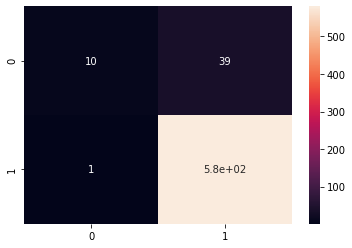

In [131]:
sns.heatmap(cm , annot = True)

In [132]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.91      0.20      0.33        49
           1       0.94      1.00      0.97       581

    accuracy                           0.94       630
   macro avg       0.92      0.60      0.65       630
weighted avg       0.93      0.94      0.92       630



# Improving model - 1

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      0.22      0.36        49
           1       0.94      1.00      0.97       581

    accuracy                           0.94       630
   macro avg       0.93      0.61      0.66       630
weighted avg       0.94      0.94      0.92       630



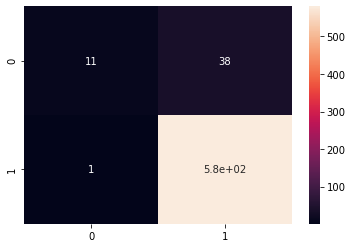

In [138]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

randomforest_classifier = RandomForestClassifier(n_estimators = 300, random_state = 0)
randomforest_classifier.fit(x_train, y_train)
y_predict = randomforest_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

# Improving model

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
             "max_depth": [3,5,8,None]}

rf_model = RandomForestClassifier(random_state = 357)

rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1,verbose = 1).fit(x_train, y_train)

rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(x,y)

In [137]:
from sklearn.model_selection import cross_val_score
tuned = [rf_tuned]
print("Best Model Parameters and Scores:")
for i in tuned:
    score = cross_val_score(i, x_train, y_train, cv = 10).mean()
    print(i,"score:",score)

Best Model Parameters and Scores:


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: F

RandomForestClassifier(max_features=7) score: 0.9309523809523809


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
